## Лабораторная работа №1 | Вариант 4

Выполнил:

### 1. Numpy

In [4]:
import numpy as np

1. Найти индексы не нулевых элементов массива [1,2,0,0,4,0]

In [6]:
arr = [1, 2, 0, 0, 4, 0]

print(np.nonzero(arr)[0])

[0 1 4]


2. Создайте единичную матрицу размером 3х3

In [8]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [10]:

pattern = [[1,0],[0,1]]
print(np.tile(pattern, (4, 4)))

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


4. Дан 1D массив, удалите все элементы которые входят в диапазон `[3, 8]` inplace

In [12]:
arr = [0, 4, 4, 2, 1, 4, 8, 7, 10, 15]
np_arr = np.array(arr)
mask = (np_arr < 3) | (np_arr > 8)
arr[:] = np_arr[mask]
print(arr)

[0, 2, 1, 10, 15]


5. Создайте случайный вектор размером 10 элементов и замените максимальный элемент на 0

In [14]:
arr = np.random.randint(1, 100, size=10)
arr[np.argmax(arr)] = 0
print(arr)

[96 57 20 46 50 11  0 89 89 18]


6. Как распечатать все значения в массиве?

In [16]:
arr = np.array([1, 2, 2, 3, 4, 4, 4, 5])
print(np.unique(arr))

[1 2 3 4 5]


7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [18]:
points = np.random.rand(100, 2)
distance = np.linalg.norm(points[0] - points[1])
print(distance)

0.36295086925992087


8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [20]:
float_arr = np.array([1.5, 2.3, 3.7, 4.9], dtype = np.float32)
float_arr = float_arr.astype(np.int32, copy=False)
float_arr

array([1, 2, 3, 4])

9. Как прочитать заданный файл?
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [22]:
data = """1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11"""

with open('data.txt', 'w') as file:
    file.write(data)
arr = np.genfromtxt('data.txt', delimiter=',', filling_values=np.nan)
print(arr)

[[ 1.  2.  3.  4.  5.]
 [ 6. nan nan  7.  8.]
 [nan nan  9. 10. 11.]]


10. Какой эквивалент enumerate для numpy массивов?

In [24]:

arr = np.array([10, 20, 30, 40])
for index, value in np.ndenumerate(arr):
    print(index[0], value)

0 10
1 20
2 30
3 40


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Файл: `russian-housing-market.csv`

```
price_doc - Цена продажи
id - Id транзакции
timestamp - Дата транзакции
full_sq - суммарная площадь в квадратных метрах, включая лоджию, валконы и отдельные нежилые помещения
life_sq - жилая площаль в квадратных метрах, исключая лоджии, балконы и прочие нежилые помещения
floor - для апартаментов, этаж помещения
max_floor - количество этажей в здании
material - материал стен
build_year - год постройки
num_room - количество жилых комнат
kitch_sq - площадь кухни
state - состояние апартаментов
product_type - покупка или инвестиция собственника-арендатора
sub_area - название района
```

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('russian-housing-market.csv')

1. Посчитайте количество записей в датасете с отсутствующей информацией о жилой площади жилого помещения

In [30]:
df['life_sq'].isna().sum()

6383

2. Предложите способ заменить отсутствующие значения из пункта 1 и реализуйте его. Способ нужно аргументировать(сказать почему это достаточно хорошее приближение)

In [32]:
# Берём медианный коэффициент отношения жилой площади к общей площади, на его основе считаем жилую площадь для пропусков
med_coeff = (df['life_sq']/df['full_sq']).median()
df['life_sq'] = df['life_sq'].fillna(df['full_sq']*med_coeff)
df['life_sq'].isna().sum()

0

3. Какие значения имеет 25, 50 и 75 перцентили полной площади помещения

In [34]:
perc = [25, 50, 75]
for i in perc:
    print(f"{i}th percentile: {df['full_sq'].quantile(i/100)}")

25th percentile: 38.0
50th percentile: 49.0
75th percentile: 63.0


4. Посчитайте среднюю стоимость продажи помещений с общей площадью от 50 до 70 квадратных метров

In [36]:
df[(df['full_sq']>=50) & (df['full_sq']<=70)]['price_doc'].mean()

7243041.190994609

5. Какая максимальная этажность здания представлена в датасете

In [38]:
df['max_floor'].max()

117.0

6. Выявите район с самым дорогим жильем

In [40]:
df.loc[df['price_doc'].idxmax()]['sub_area']

'Teplyj Stan'

7. Посчитайте среднюю стоимость за квадратный метр жилья в Митино(Mitino)

In [42]:
df_mit = df[df['sub_area']=='Mitino']
mean_sq_price = (df_mit['price_doc']/df_mit['full_sq']).mean()
mean_sq_price

171841.39999559196

8. Посчитайте среднюю площадь комнаты в Бибирево

In [44]:
df_bib = df[df['sub_area']=='Bibirevo']
mean_sq_room = (df_bib['full_sq']/df_bib['num_room']).mean()
mean_sq_room

28.12874251497006

9. Проанализируйте есть ли разница в цене между квартирами на 1 и 9 этажах

In [46]:
df[df['floor']==9]['price_doc'].mean() - df[df['floor']==1]['price_doc'].mean()

1198202.9969607173

10. Найдите минимальную стоимость квартиры с жилой площадью не менее 60 квадратных метров, не менее чем 3мя комнатами и не ниже чем на 5 этаже

In [48]:
df[(df['life_sq']>=60) & (df['num_room']>=3) & (df['floor']>=5)]['price_doc'].min()

1000000

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [51]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [52]:
df['timestamp'] = df['timestamp'].str[:4].astype(int)

1. Как менялась средняя цена квартиры в Нагатинском Затоне(Nagatinski Zaton) с течением времени

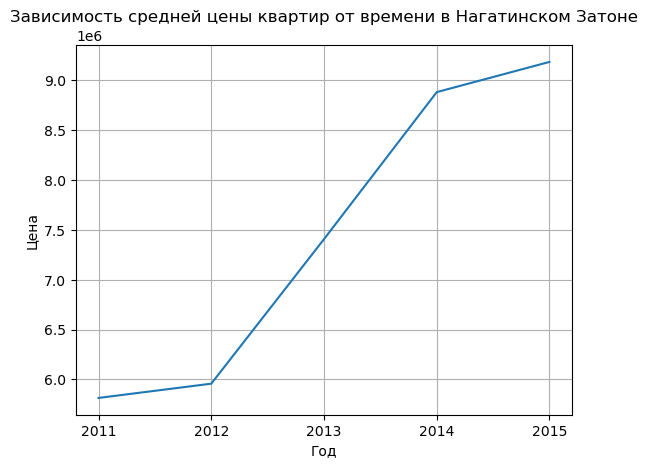

In [54]:
df_time_average = df[df['sub_area']=='Nagatinskij Zaton'].groupby('timestamp')['price_doc'].mean()
fig, ax = plt.subplots()
x = df_time_average.index
y = df_time_average.values
plt.plot(x, y)
plt.title('Зависимость средней цены квартир от времени в Нагатинском Затоне')
plt.xlabel('Год')
plt.ylabel('Цена')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.show()

2. Постройте гистограмму распределения цен на квартиры с общей площадью более 50 кв.метров

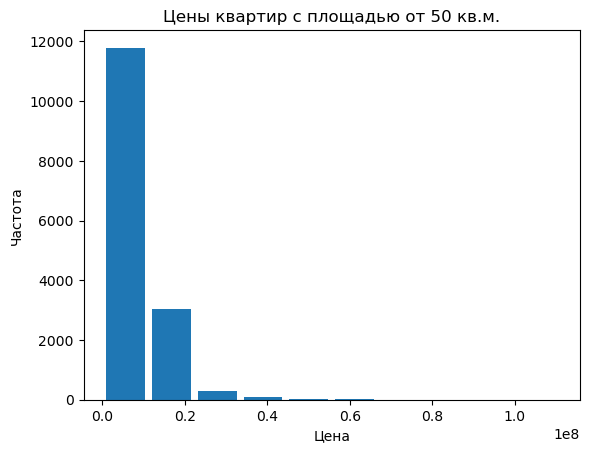

In [56]:
prices_50 = df[df['full_sq']>=50]['price_doc']
plt.hist(prices_50, rwidth=0.85)
plt.title('Цены квартир с площадью от 50 кв.м.')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

3. Визуализируйте количество проданных квартир в разных районах

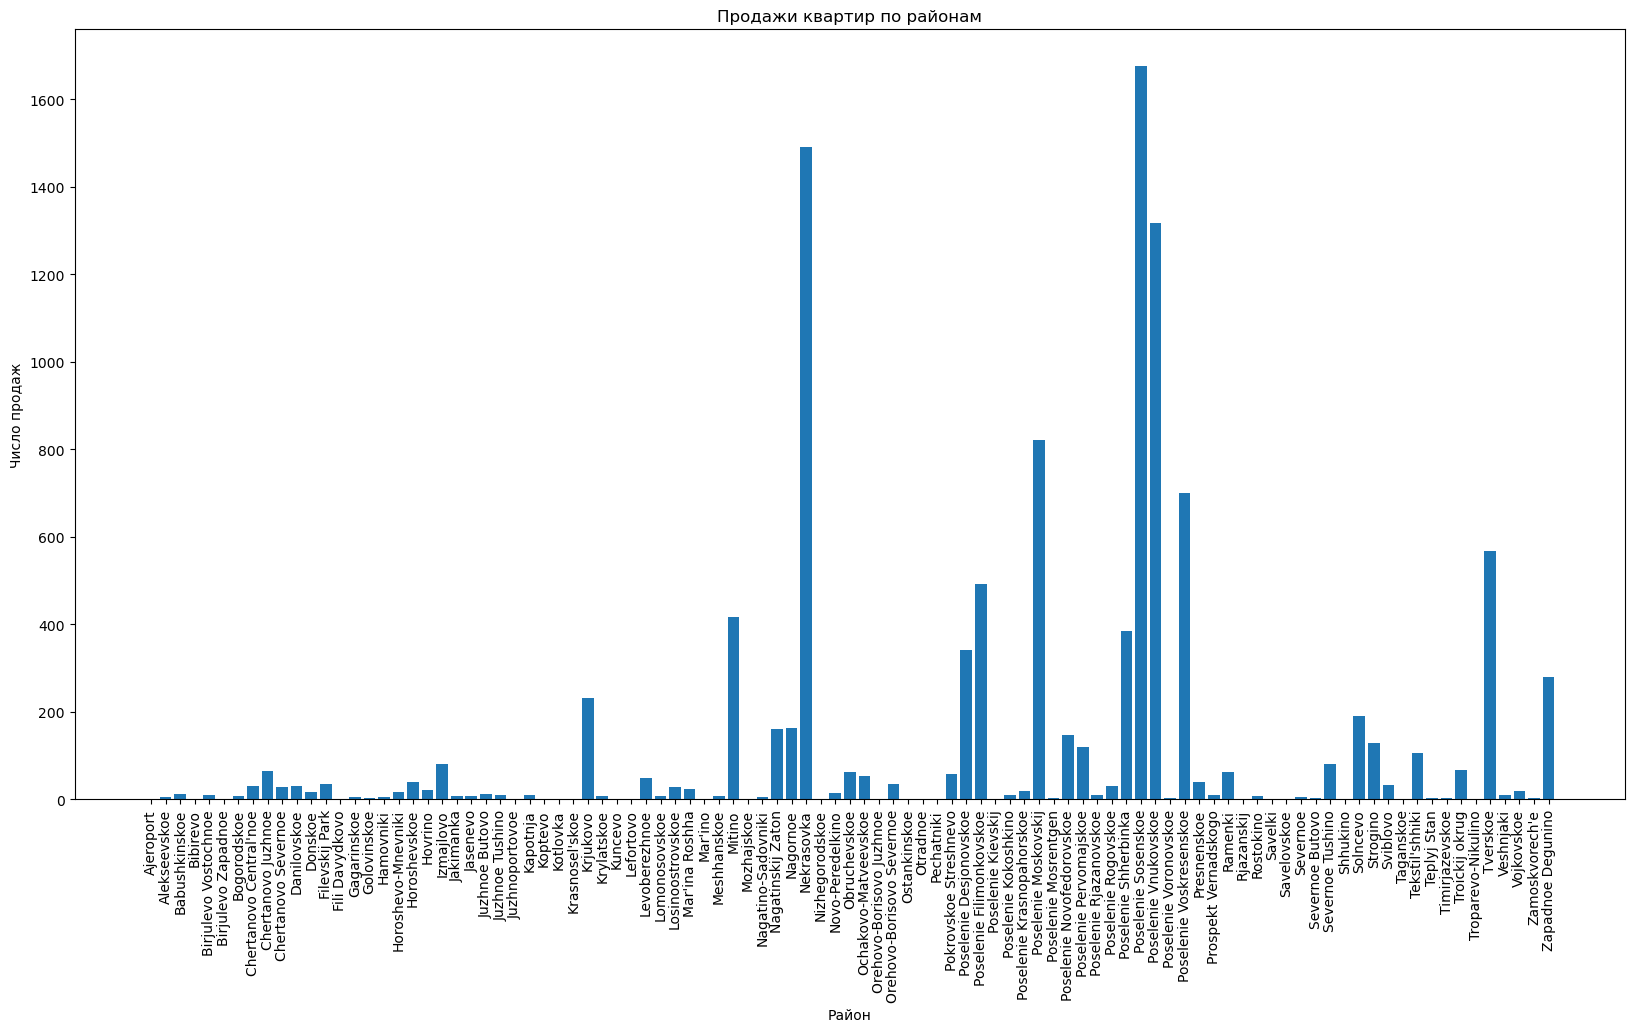

In [58]:
flats_by_place = df[df['product_type'] == 'OwnerOccupier'].groupby('sub_area')['id'].count()
x = flats_by_place.index
y = flats_by_place.values
plt.figure(figsize = (20,10))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Продажи квартир по районам')
plt.xlabel('Район')
plt.ylabel('Число продаж')
plt.show()

4. Постройте box plot отображающий распределение полных площадей квартир в Басманном районе

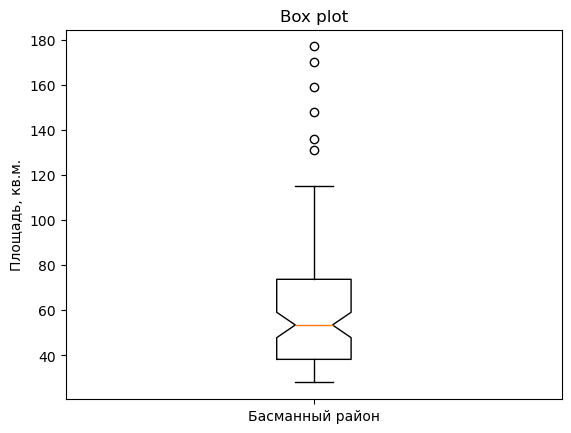

In [60]:
sq_bas = df[df['sub_area']=='Basmannoe']['full_sq']
plt.boxplot(sq_bas, notch='True', labels = ['Басманный район'])
plt.title('Box plot')
plt.ylabel('Площадь, кв.м.')
plt.show()

5. Визуализируйте зависимость средней стоимости квартир в зависимости от этажа

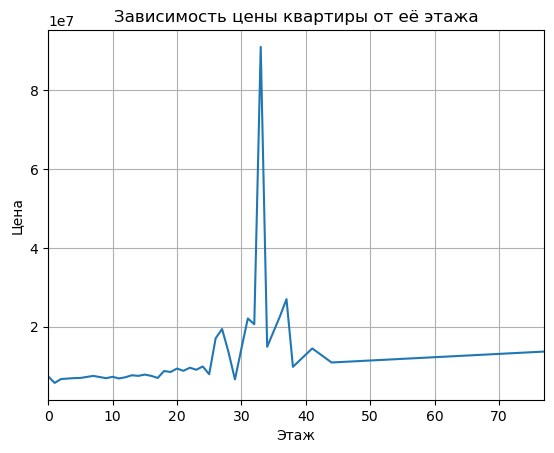

In [62]:
df_floor_price = df.groupby(df['floor'])['price_doc'].mean()
x = df_floor_price.index
y = df_floor_price.values
fix, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(df['floor'].min(),df['floor'].max())
plt.title('Зависимость цены квартиры от её этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

6. Покажите как меняется средняя площадь квартир в зависимости от района

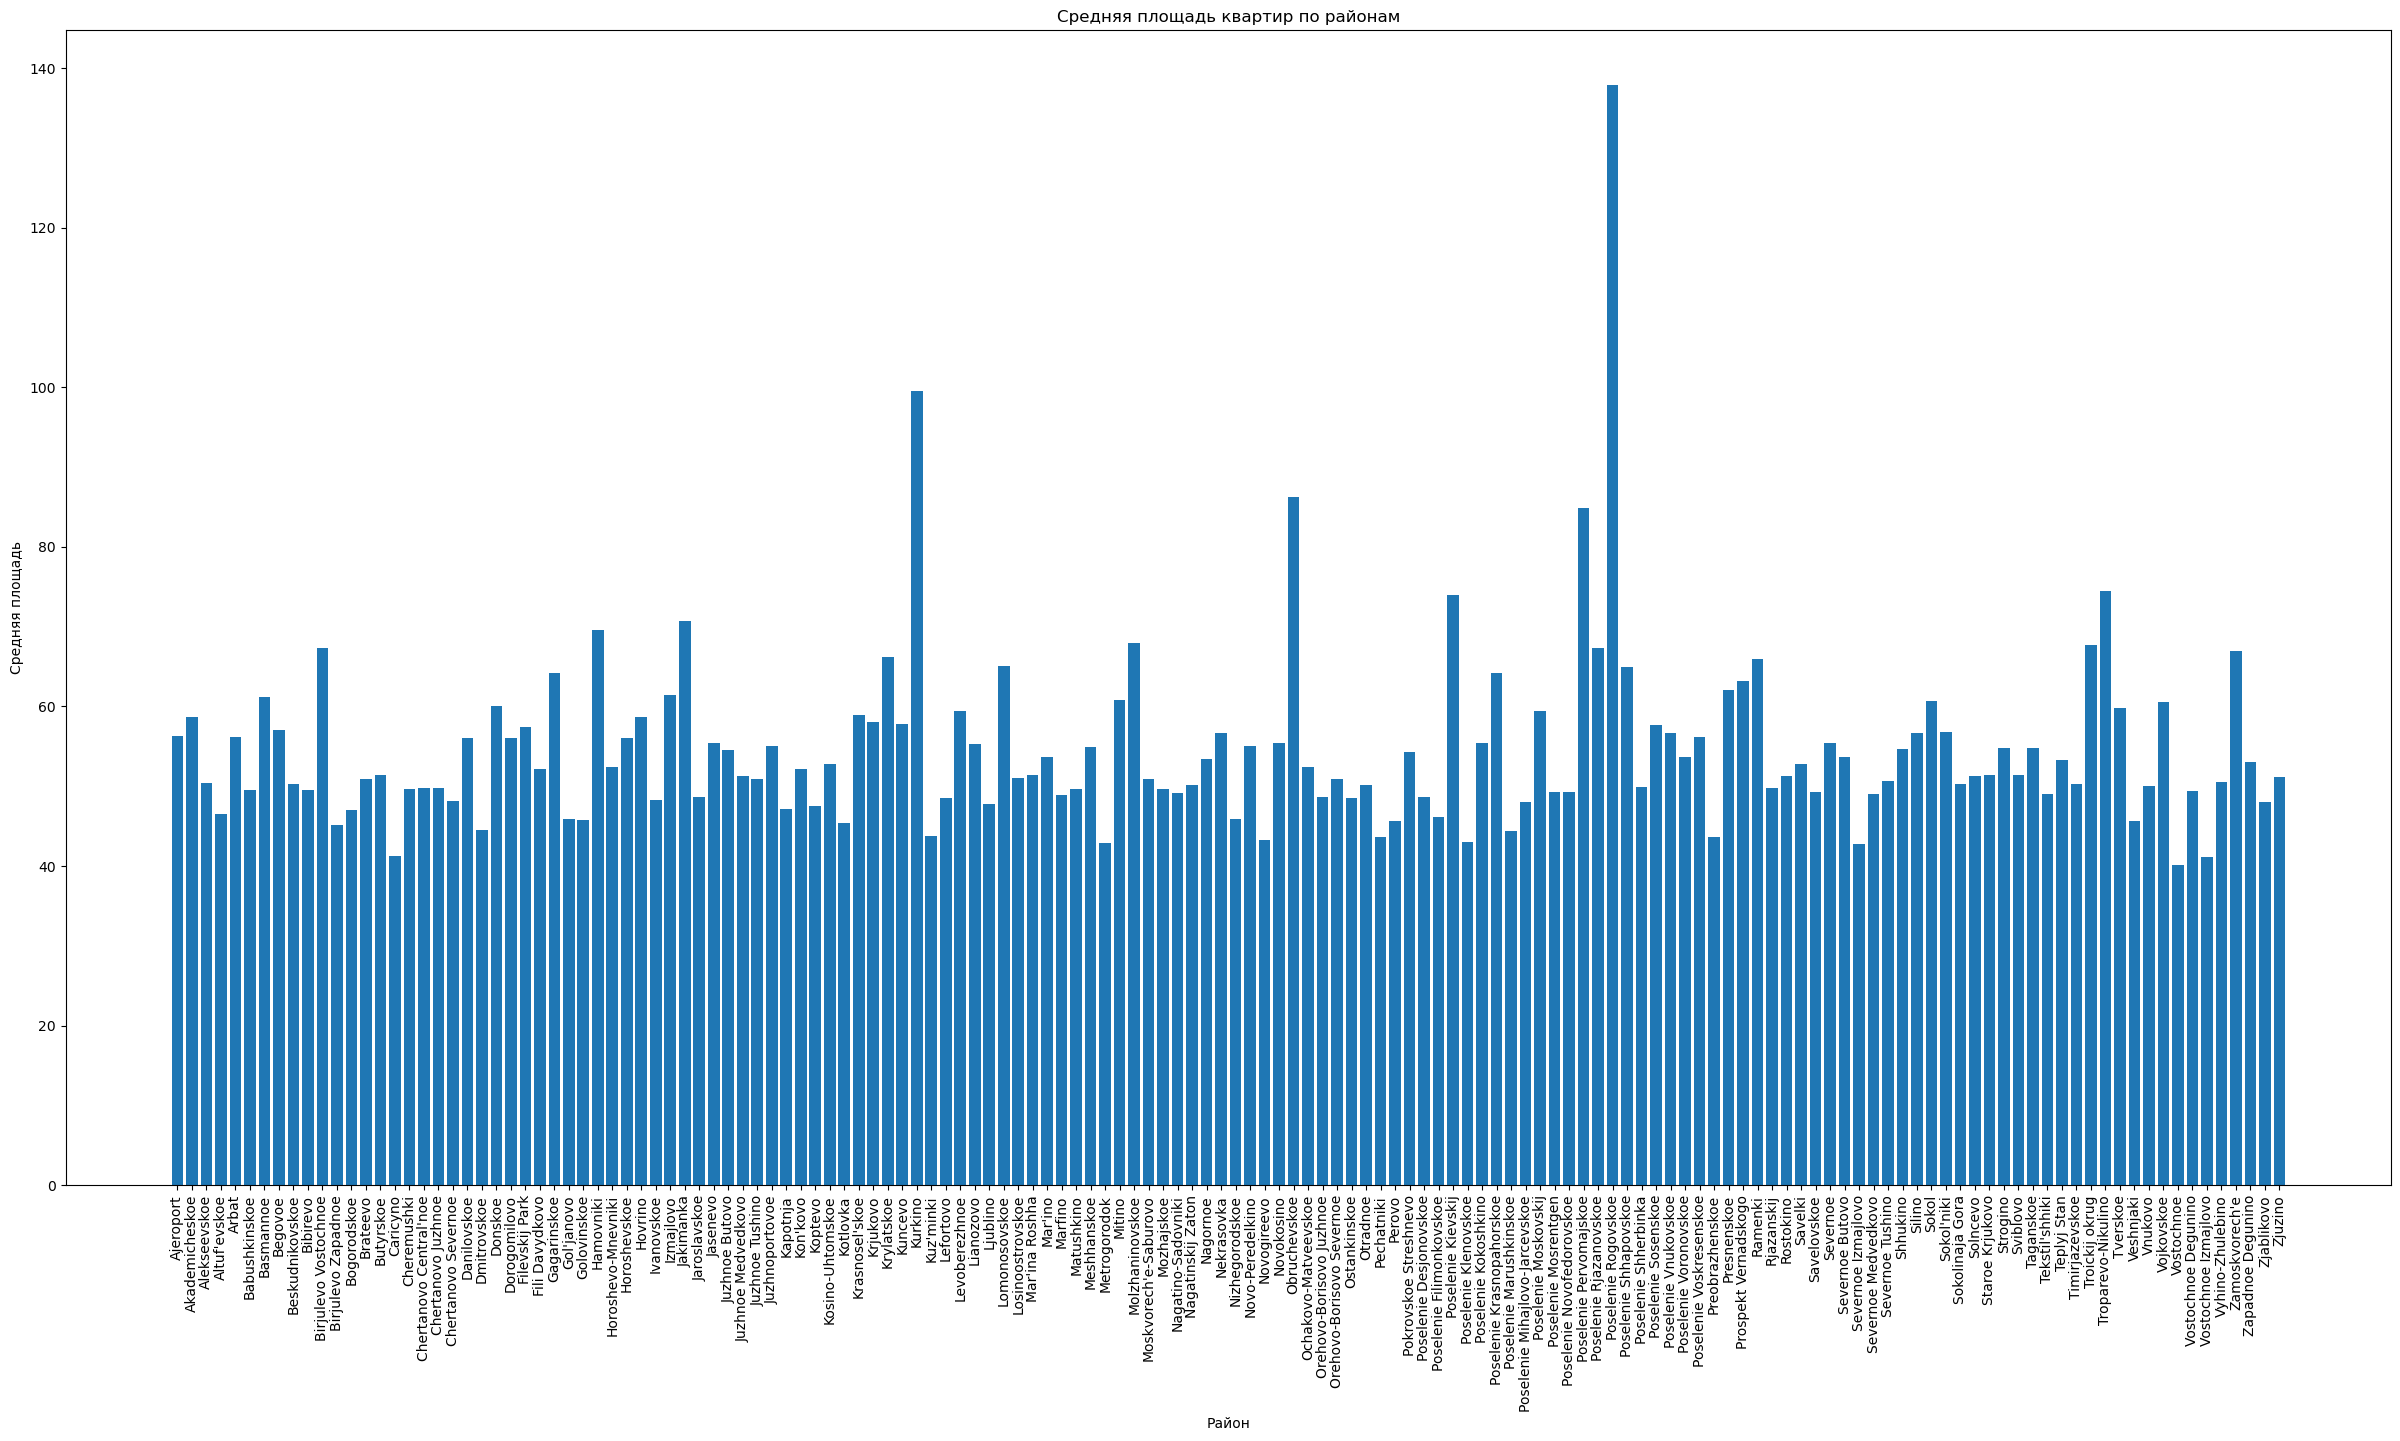

In [64]:
sq_by_place = df.groupby('sub_area')['full_sq'].mean()
x = sq_by_place.index
y = sq_by_place.values
plt.figure(figsize = (30,15))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Средняя площадь квартир по районам')
plt.xlabel('Район')
plt.ylabel('Средняя площадь')
plt.show()

7. Постройте график изменения медианной цены на квартиру менее 50 кв. метров за период с 2011 до 2014 года*

\* Задание на доп. балл

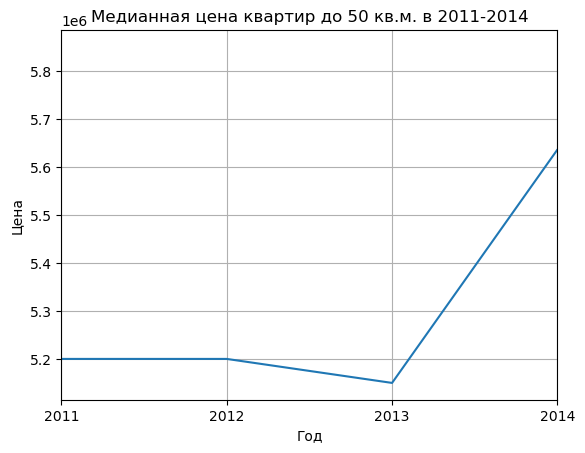

In [66]:
df_50_11_14 = df[df['full_sq']<50].groupby('timestamp')['price_doc'].median()
x = df_50_11_14.index
y = df_50_11_14.values
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title('Медианная цена квартир до 50 кв.м. в 2011-2014')
plt.xlabel('Год')
plt.ylabel('Цена')
ax.set_xlim(2011,2014)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.show()